In [1]:
import os
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

## On Raw Data

In [7]:
raw_dir = "../data/raw"

In [8]:
classes = os.listdir(raw_dir)
print(f"Classes found: {classes}")

Classes found: ['bengin', 'malignant', 'normal']


In [9]:
image_counts = {cls: len(os.listdir(os.path.join(raw_dir, cls))) for cls in classes}
print("Image counts per class:", image_counts)

Image counts per class: {'bengin': 120, 'malignant': 561, 'normal': 416}


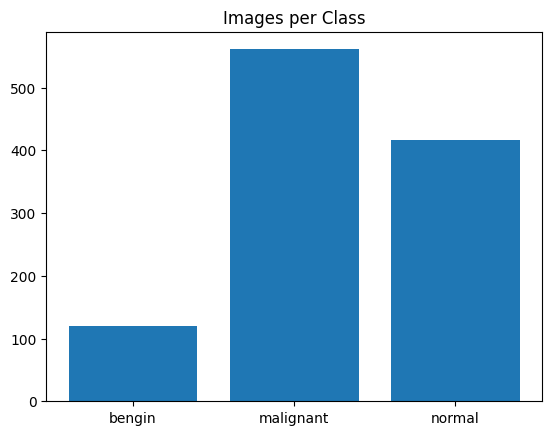

In [10]:
plt.bar(image_counts.keys(), image_counts.values())
plt.title("Images per Class")
plt.show()

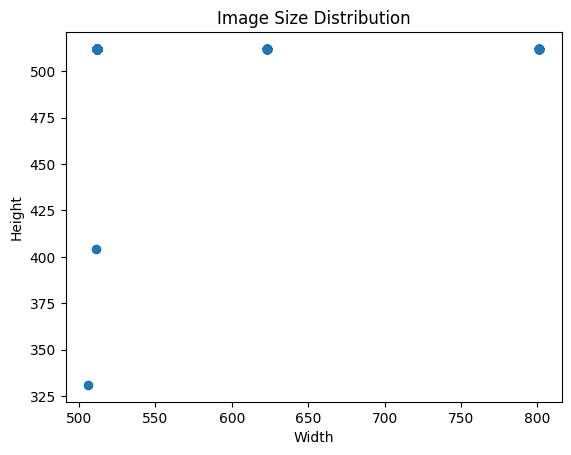

In [11]:
sizes = []
for cls in classes:
    cls_dir = os.path.join(raw_dir, cls)
    for fname in os.listdir(cls_dir):
        path = os.path.join(cls_dir, fname)
        try:
            with Image.open(path) as img:
                sizes.append(img.size)  # (width, height)
        except Exception as e:
            print(f"Error reading {path}: {e}")

widths, heights = zip(*sizes)
plt.scatter(widths, heights)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Size Distribution")
plt.show()

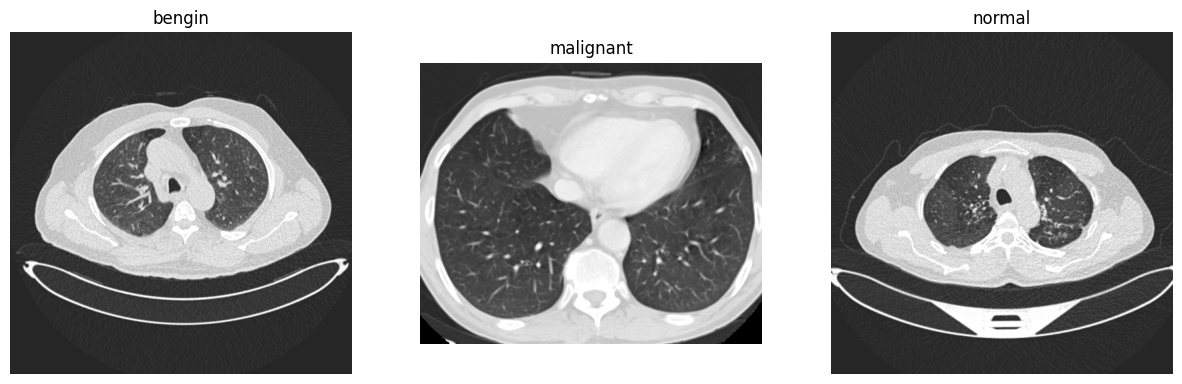

In [12]:
fig, axs = plt.subplots(1, len(classes), figsize=(15,5))
for i, cls in enumerate(classes):
    img_name = os.listdir(os.path.join(raw_dir, cls))[0]
    img_path = os.path.join(raw_dir, cls, img_name)
    img = Image.open(img_path)
    axs[i].imshow(img)
    axs[i].set_title(cls)
    axs[i].axis('off')

plt.show()

## On Balanced and Preprocessed Data

In [13]:
pre_dir = "../data/preprocessed"

In [14]:
# Count images per class
classes = sorted(os.listdir(pre_dir))
pre_image_counts = {cls: len(os.listdir(os.path.join(pre_dir, cls))) for cls in classes}
print("Preprocessed image count per class:", pre_image_counts)

Preprocessed image count per class: {'bengin': 400, 'malignant': 561, 'normal': 416}


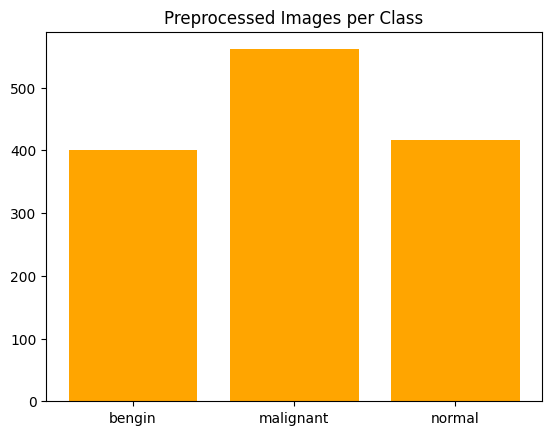

In [15]:
plt.bar(pre_image_counts.keys(), pre_image_counts.values(), color="orange")
plt.title("Preprocessed Images per Class")
plt.show()


In [16]:
# Check all images are now same size and visualize again
sizes = []
for cls in classes:
    cls_dir = os.path.join(pre_dir, cls)
    for fname in os.listdir(cls_dir):
        path = os.path.join(cls_dir, fname)
        with Image.open(path) as img:
            sizes.append(img.size)

# All should be the target size
print("Unique sizes found in preprocessed data:", set(sizes))


Unique sizes found in preprocessed data: {(224, 224)}


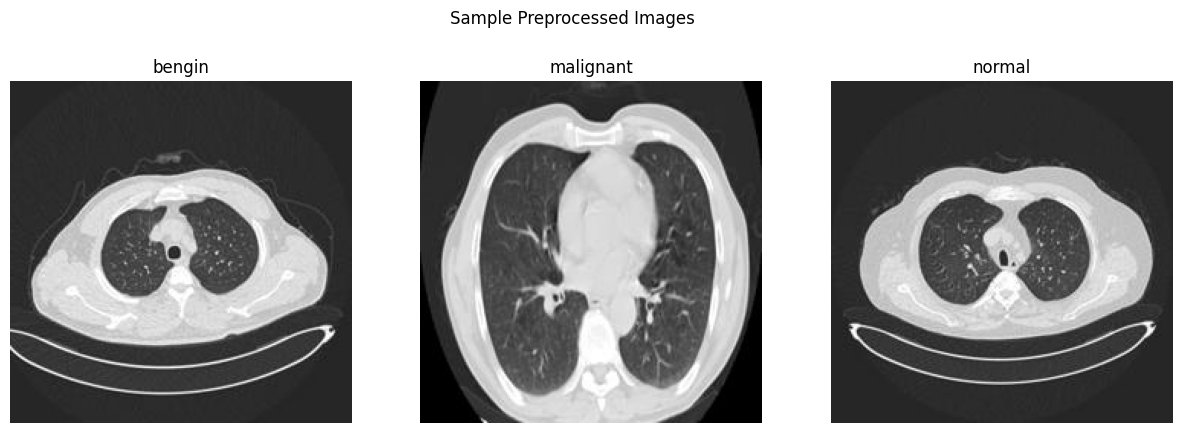

In [17]:
# Plot sample images from preprocessed sets
fig, axs = plt.subplots(1, len(classes), figsize=(15,5))
for i, cls in enumerate(classes):
    img_name = os.listdir(os.path.join(pre_dir, cls))[0]
    img_path = os.path.join(pre_dir, cls, img_name)
    img = Image.open(img_path)
    axs[i].imshow(img)
    axs[i].set_title(cls)
    axs[i].axis('off')
plt.suptitle("Sample Preprocessed Images")
plt.show()